#Introduction to Pandas with plotting

In [2]:
import pandas as pd
data = pd.read_csv('mobile_cleaned.csv')
data.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0


In [3]:
data.tail()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
104,3,10,14,192.0,540,1.8,9.4,2,2.0,2,5.4,30,1,0,0,147.0,26,7,54900,15,2160,10,4,0,18.0,4,3,4,25,3,4,29,6,77.2,256.0,6,3,3410,8,1
105,0,5,3,157.0,400,2.3,7.7,5,5.0,3,5.5,30,4,144,0,150.9,7,9,56900,27,2160,10,1,8,12.0,1,4,4,2,6,6,27,1,72.6,200.0,9,3,3600,101,1
106,3,10,6,192.0,384,1.8,7.3,2,5.0,3,5.5,30,4,81,2,158.2,16,11,59000,24,2160,7,1,2,12.0,2,2,2,1,0,1,16,6,77.9,0.0,14,13,2750,1,1
107,3,10,12,129.0,250,1.4,6.9,2,1.2,3,4.7,60,4,39,2,138.1,16,11,64500,14,1080,7,1,2,8.0,2,1,1,1,0,1,13,6,67.0,0.0,12,13,1810,7,1
108,2,8,3,158.0,400,2.2,7.4,6,8.0,3,5.5,30,1,0,0,152.7,7,8,27999,40,2160,9,1,6,16.0,4,6,6,12,6,5,16,6,74.7,0.0,10,12,3000,2,0


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
dir(data)

['FM',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__r

In [6]:
len(data)

109

In [7]:
data.shape

(109, 40)

In [9]:
data.loc[2]

sim_type                                0.00
aperture                                9.00
gpu_rank                               55.00
weight                                142.00
stand_by_time                         329.00
processor_frequency                     1.50
thickness                               8.50
flash_type                              5.00
front_camera_resolution                 2.00
auto_focus                              3.00
screen_size                             5.00
frames_per_second                      30.00
FM                                      2.00
no_of_reviews_in_gsmarena_in_week      20.00
os                                      0.00
phone_height                          145.50
screen_protection                       4.00
sim_size                                3.00
price                                4777.00
talk_time                              10.00
video_resolution                     1080.00
display_resolution                      4.00
removable_

In [0]:
df_thin= data[['stand_by_time','expandable_memory','price','battery_capacity','is_liked']]

In [11]:
df_thin.head()


,stand_by_time,expandable_memory,price,battery_capacity,is_liked
0,250,64.0,3870,2000,1
1,300,32.0,4059,2000,1
2,329,32.0,4777,2500,0
3,385,32.0,5799,3000,1
4,385,32.0,5990,3000,0


In [15]:
df_liked = df_thin[df_thin['is_liked']==1]
df_liked.shape

(92, 5)

In [16]:
df_liked.price.describe()

count       92.000000
mean     19393.239130
std      14559.162189
min       3870.000000
25%       9299.000000
50%      14124.000000
75%      24924.750000
max      64500.000000
Name: price, dtype: float64

In [17]:
df_liked['price'].mean()

19393.239130434784

In [20]:
df_thin[df_thin['is_liked']==1].price.mean()

19393.239130434784

In [0]:
g= df_thin.groupby(['is_liked'])

In [25]:
for key, df_jey in g:
  print(key)
  print(df_jey)

0
     stand_by_time  expandable_memory  price  battery_capacity  is_liked
2              329               32.0   4777              2500         0
4              385               32.0   5990              3000         0
5              280               32.0   5999              2900         0
11             300              128.0   6990              2600         0
22             354              128.0   7999              2400         0
38             490               32.0   9999              2100         0
53             345               64.0  14300              2950         0
60             840                0.0  15689              4100         0
74             390              128.0  21999              2800         0
77             620              128.0  22999              3100         0
78             618                0.0  24499              3600         0
80             598                0.0  24999              3000         0
83             504              200.0  25500     

In [26]:
df_thin.groupby(['is_liked']).mean()

,stand_by_time,expandable_memory,price,battery_capacity
is_liked,,,,
0,457.235294,68.235294,19264.823529,2874.941176
1,394.945652,111.217391,19393.239130,2835.652174


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


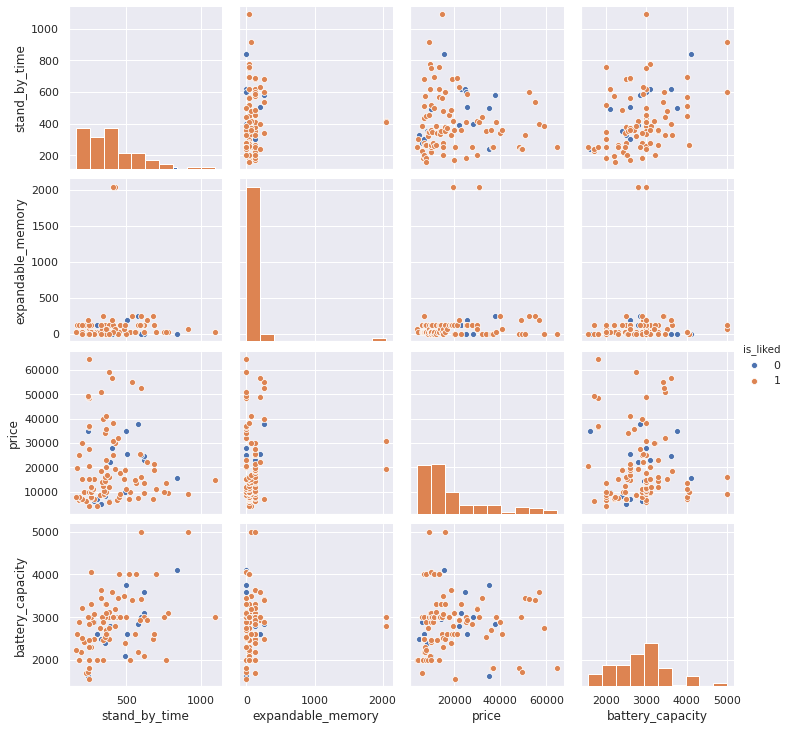

In [32]:
ax = sns.pairplot(df_thin,diag_kind='hist',hue='is_liked')